In [2]:
%matplotlib notebook
import sympy as s
import math as m
import matplotlib.pyplot as plt
import scipy.integrate as sc
import numpy as np
from sympy import init_printing
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
init_printing()
rc('text', usetex = True)

## 1) Tracé de la chute libre en coordonnée de Schwarzschild
On se réfère à la page 824 du livre Gravitation

<IPython.core.display.Javascript object>


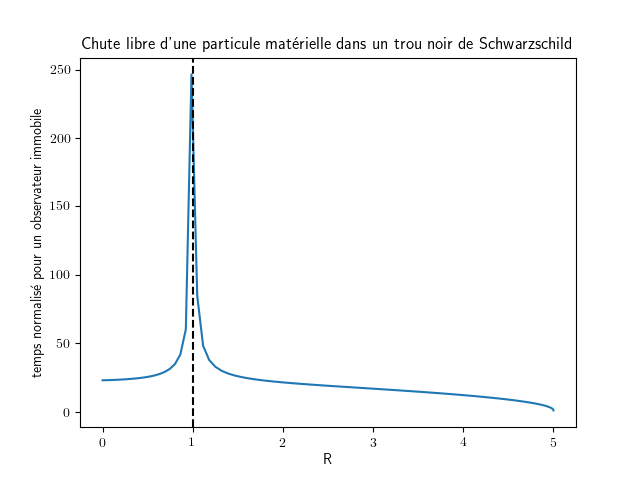

In [4]:
r_max = 5
M = 1/2
def r(eta):
    return r_max/2 * (1 + np.cos(eta))
def tau(eta):
    return np.sqrt(r_max**3 / (8*M)) * (eta + np.sin(eta))
def t(eta):
    return 2*M*np.absolute( (np.sqrt(r_max/(2*M)-1) + np.tan(eta/2)) / (np.sqrt(r_max/(2*M)-1) - np.tan(eta/2))) + 2*M*np.sqrt(r_max/(2*M)-1) * (eta + (r_max/(4*M) * (eta + np.sin(eta))))


eta = np.linspace(0, np.pi, 100)
Tau = tau(eta)
R = r(eta)
T = t(eta)

plt.figure()
plt.plot(R, T)
plt.axvline(x=2*M,color='black',linestyle='--', label = 'R_S') 
plt.ylabel('temps normalisé pour un observateur immobile')
plt.xlabel('R')
plt.title("Chute libre d'une particule matérielle dans un trou noir de Schwarzschild")
plt.show()

## 2) Tracé en coordonnées de Kruskal-Szekeres
On fait le changement de variable en u,v (cf page 827)

<IPython.core.display.Javascript object>


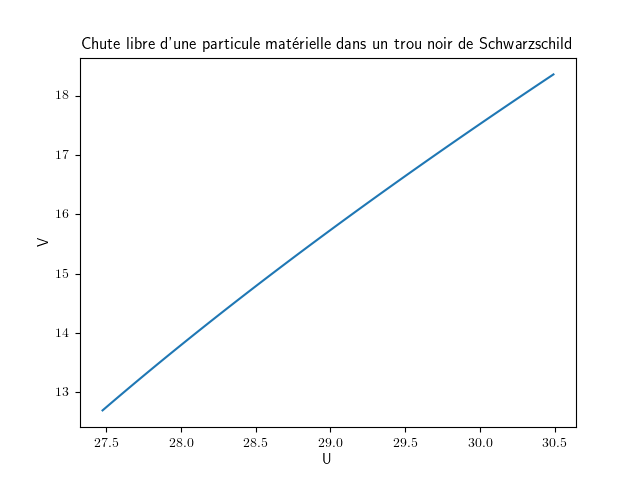

In [51]:
r_max = 5
M = 1/2
def u(eta):
    R = r(eta)
    if R > 2 * M :
        return (R/(2*M)-1)**(1/2) * np.exp(R/(4*M)) * np.cosh(t(eta)/(4*M))
    else : 
        return (-R/(2*M)+1)**(1/2) * np.exp(R/(4*M)) * np.sinh(t(eta)/(4*M))

def v(eta):
    R = r(eta)
    if R > 2 * M :
        return (R/(2*M)-1)**(1/2) * np.exp(R/(4*M)) * np.sinh(t(eta)/(4*M))
    else : 
        return (-R/(2*M)+1)**(1/2) * np.exp(R/(4*M)) * np.cosh(t(eta)/(4*M))

eta = np.linspace(0, np.pi/100, 100)
Tau = tau(eta)

U = np.vectorize(u)(eta)
V = np.vectorize(v)(eta)

plt.figure()
plt.plot(U, V)
plt.xlabel('U')
plt.ylabel('V')
plt.title("Chute libre d'une particule matérielle dans un trou noir de Schwarzschild")
plt.show()